<a href="https://colab.research.google.com/github/nyamskamau/Hypothyroid-Prediction-Dataset/blob/main/Independent_Project_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project Week 8.

## 1.Defining the Question.
> * Nairobi Hospital conducted a clinical camp to test for hypothyroidism.
>*  The data collected focused on Thyroid patients. Therefore based on the dataset at hand I would like to:
     * Build a model that determines whether or not the      patient's symptoms indicate that the patient has hypothyroid.  

## 2.Metric For Success

>* As the researcher my metric for success would be to achieve an accuracy score of 0.97% with my model.

## 3.Experimental Design Taken.
>* This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data and deal with any missing entries.
>* Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
>* Finally I will build my models and  evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

## 4.Exploring the Dataset
>* The dataset used in this analysis had 26 columns with their attributes as described below :

## 5.The appropriateness of the available data to answer the given question
>* Given the task at hand , the dataset provided was appropriate for this analysis.

## Loading the Dataset and Libraries.

>* The first step of my analysis was loading in the appropriate libraries used in the analysis, along with my dataset.
>* I then previewed my dataset and obtained information for the columns in the dataset.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

In [ ]:
data = pd.read_csv('hypothyroid.csv')


In [ ]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
data.shape

(3163, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

>* The dataset had 26 columns and 3163 rows all of the same datatype.

## Data Cleaning

>* The first step I undertook in my cleaning was replacing the '?' value in the columns with an null entry so I could count the number of null entries in the dataset.
>* I also replaced the '?' in the sex column with Male.

In [ ]:
data.sex.replace({'?':'M'},inplace=True)

In [ ]:
data.replace({"?":np.NAN},inplace=True)
data.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The TBG column had very many missing entries hence I dropped it from the dataset.

In [ ]:
data.drop('TBG', axis=1,inplace=True)

>* Then I encoded my Categorical columns with the OneHotEncoder.

In [ ]:
categorical_cols = ['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid',
'pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','FTI_measured','T4U_measured','TBG_measured']

In [ ]:
data[categorical_cols] = pd.get_dummies(data[categorical_cols], drop_first=True)

>* I then converted the remaining columns into type numeric and then filled the missing/null entries with the mean value of the respective columns.

In [ ]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num] =data[num].apply(pd.to_numeric, errors='coerce')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TSH','T3','TT4','T4U','FTI','age']])
data[['TSH','T3','TT4','T4U','FTI','age']] = imputer.transform(data[['TSH','T3','TT4','T4U','FTI','age']])

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.dtypes

status                         uint8
age                          float64
sex                            uint8
on_thyroxine                   uint8
query_on_thyroxine             uint8
on_antithyroid_medication      uint8
thyroid_surgery                uint8
query_hypothyroid              uint8
query_hyperthyroid             uint8
pregnant                       uint8
sick                           uint8
tumor                          uint8
lithium                        uint8
goitre                         uint8
TSH_measured                   uint8
TSH                          float64
T3_measured                    uint8
T3                           float64
TT4_measured                   uint8
TT4                          float64
T4U_measured                   uint8
T4U                          float64
FTI_measured                   uint8
FTI                          float64
TBG_measured                   uint8
dtype: object

## Exploring the Data


### Univariate Analysis.

>* Next I carried out EDA on the columns in my dataset

In [ ]:
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.154214,0.310149,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.923180,0.780272,1.939749,0.921277,108.850000,0.921593,0.978199,0.921910,115.397771,0.082200
std,0.213248,17.881969,0.462627,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.060029,0.414128,0.880441,0.269348,43.657766,0.268853,0.217513,0.268356,57.838927,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,51.154214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.939749,1.000000,107.000000,1.000000,0.978199,1.000000,110.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.923180,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5240112240>,
      dtype=object)

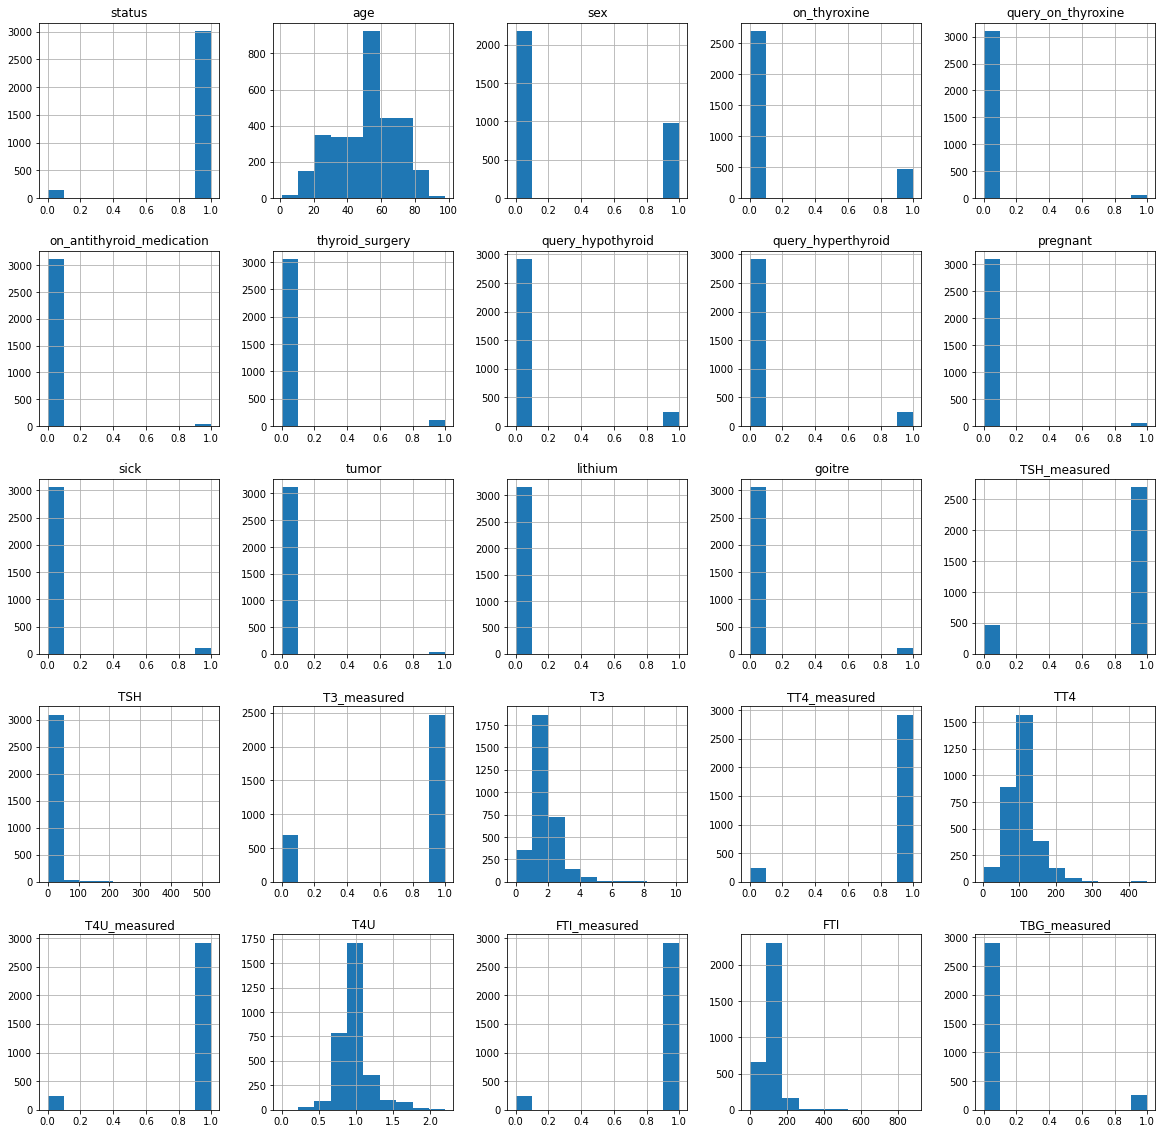

In [ ]:
histograms = data.hist(figsize=(20,20))
histograms

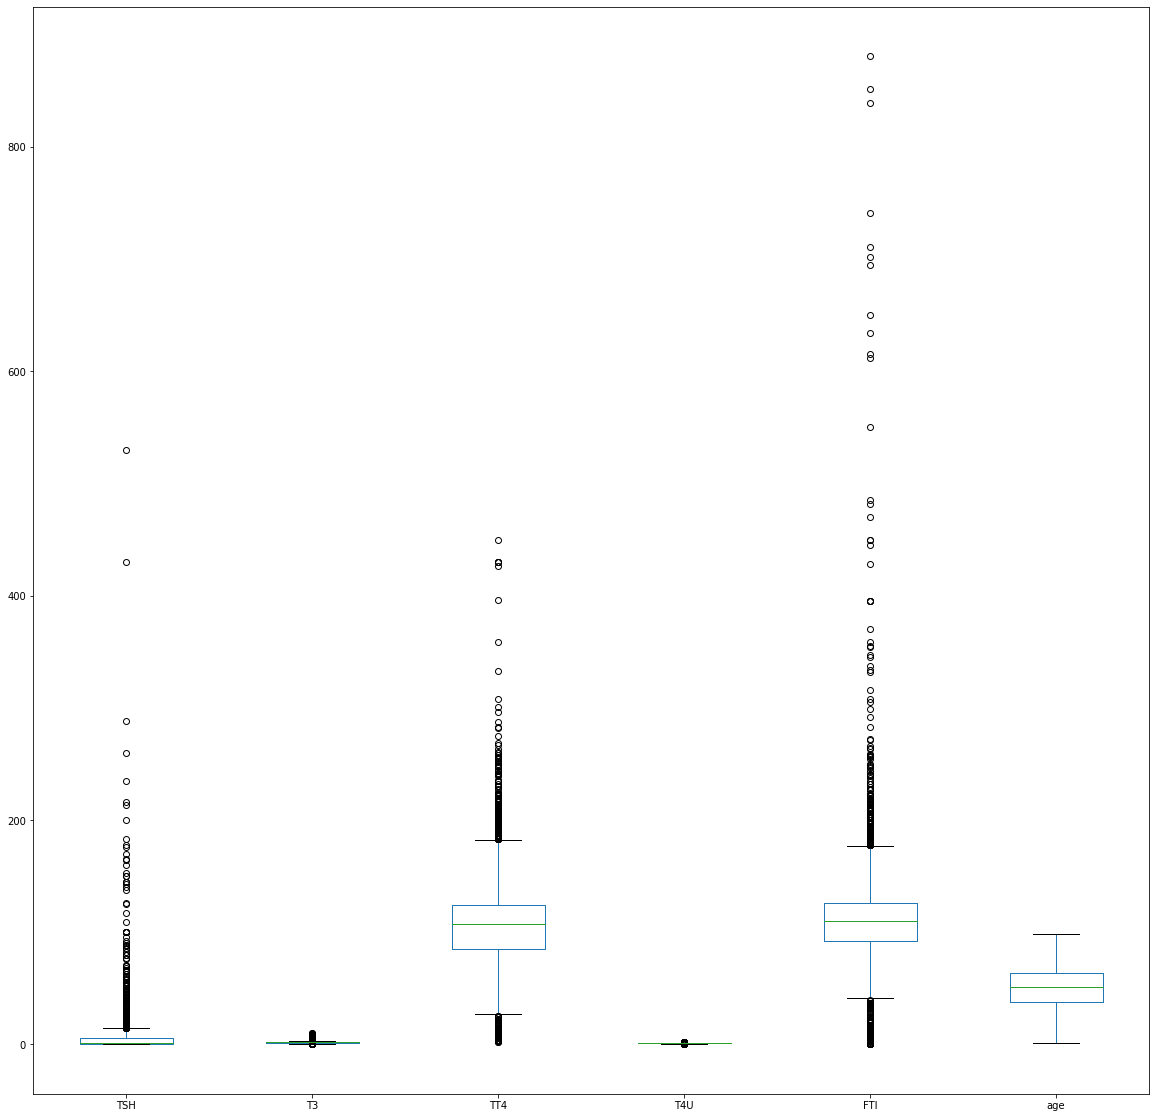

In [ ]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num].boxplot(grid=False,figsize=(20,20))


>* The dataset had many outliers but I opted not to remove them.

#### Plotting Count Plots for the Categorical Features

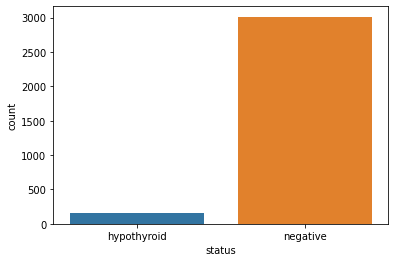

In [ ]:
sns.countplot(x = data['status'])

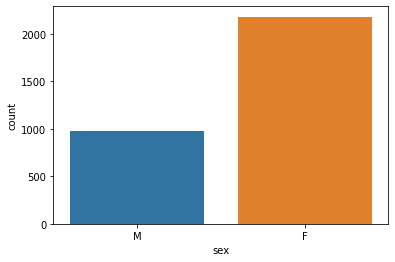

In [ ]:
sns.countplot(x = data['sex'])

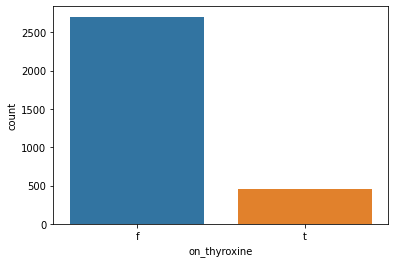

In [ ]:
sns.countplot(x = data['on_thyroxine'])

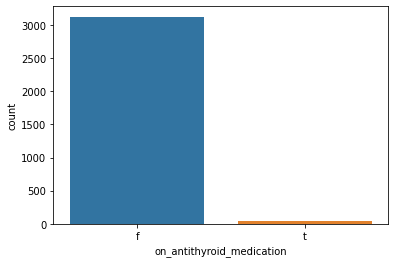

In [ ]:
sns.countplot(x = data['on_antithyroid_medication'])

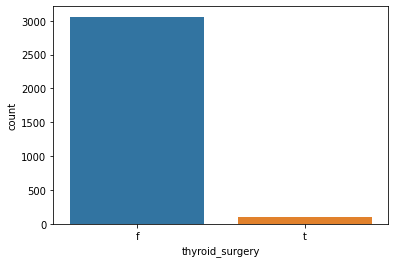

In [ ]:
sns.countplot(x = data['thyroid_surgery'])

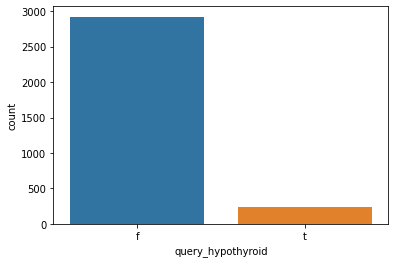

In [ ]:
sns.countplot(x = data['query_hypothyroid'])

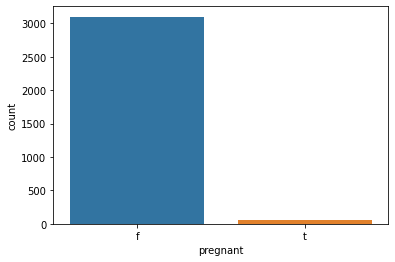

In [ ]:
sns.countplot(x = data['pregnant'])

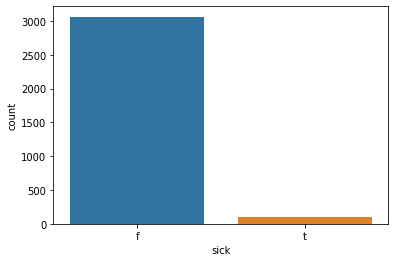

In [ ]:
sns.countplot(x=data['sick'])

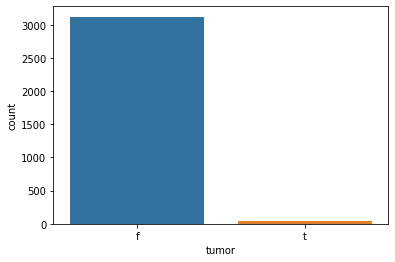

In [ ]:
sns.countplot(x = data.tumor)

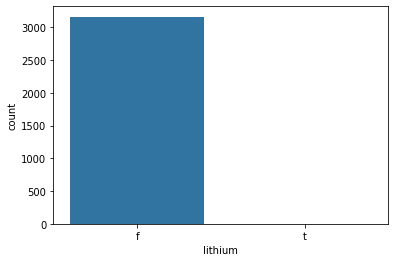

In [ ]:
sns.countplot(x = data.lithium)

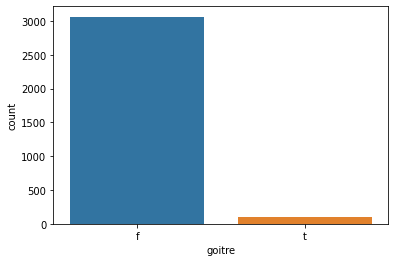

In [ ]:
sns.countplot(x = data.goitre)

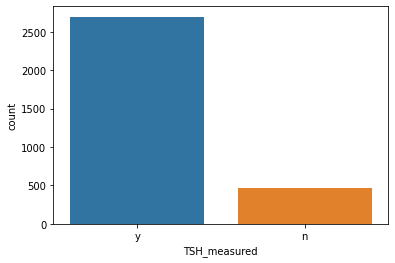

In [ ]:
sns.countplot(x=data.TSH_measured)

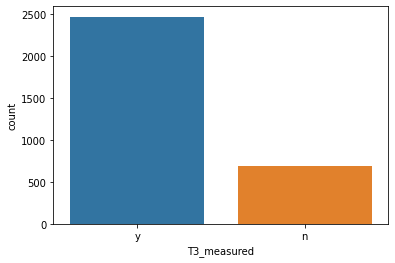

In [ ]:
sns.countplot(x=data.T3_measured)

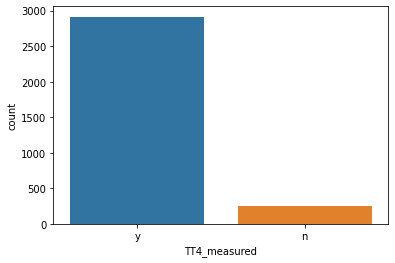

In [ ]:
sns.countplot(x=data.TT4_measured)

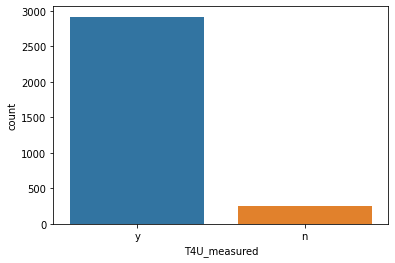

In [ ]:
sns.countplot(x=data.T4U_measured)

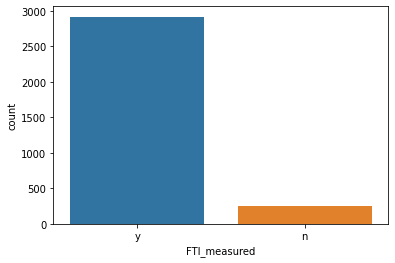

In [ ]:
sns.countplot(x=data.FTI_measured)

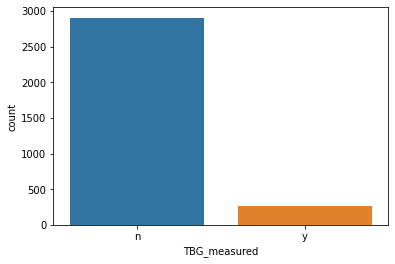

In [ ]:
sns.countplot(x=data.TBG_measured)

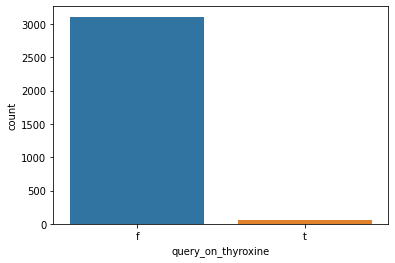

In [ ]:
sns.countplot(x=data.query_on_thyroxine)

### Bivariate Analysis

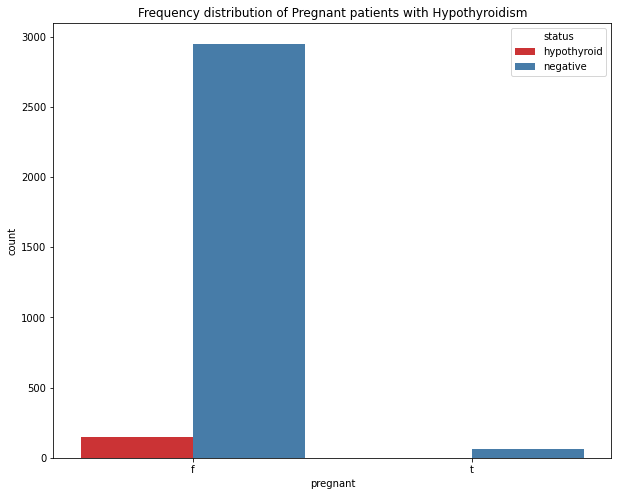

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="pregnant", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of Pregnant patients with Hypothyroidism")
plt.show()

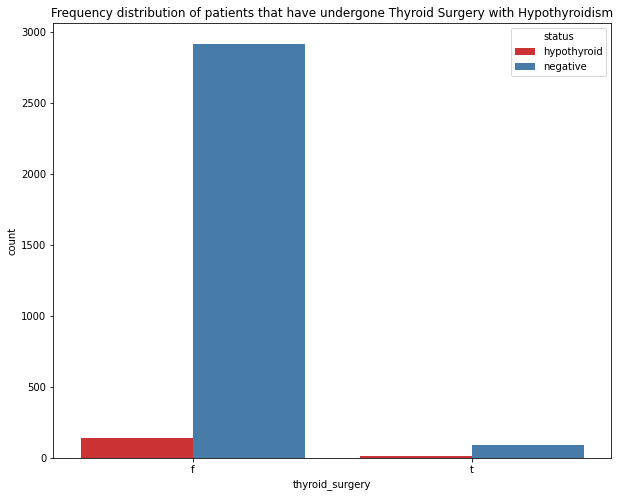

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="thyroid_surgery", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients that have undergone Thyroid Surgery with Hypothyroidism")
plt.show()

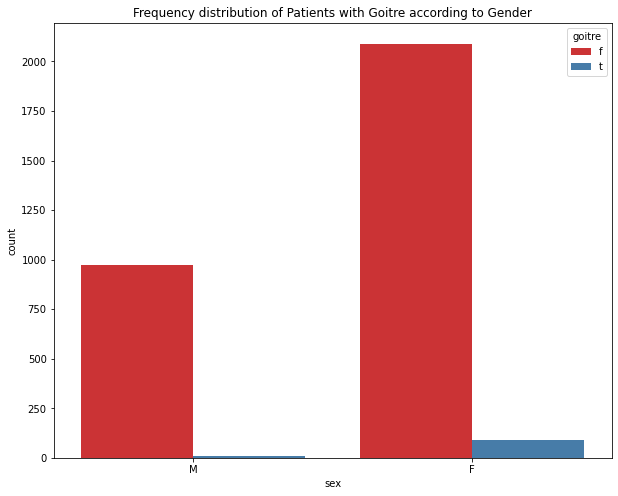

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="sex", hue="goitre", data=data, palette="Set1")
ax.set_title("Frequency distribution of Patients with Goitre according to Gender")
plt.show()

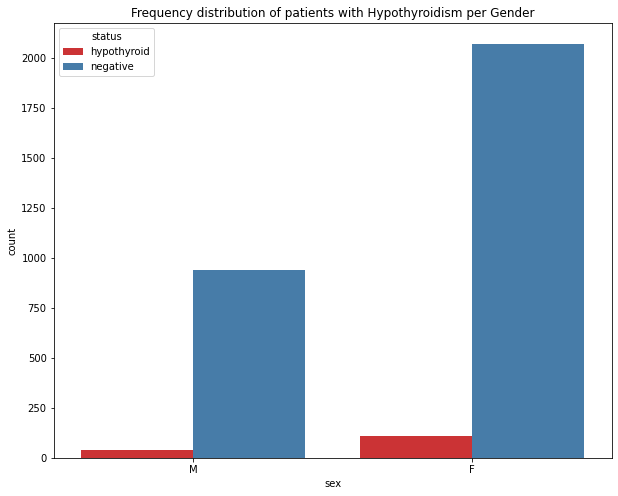

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="sex", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients with Hypothyroidism per Gender")
plt.show()

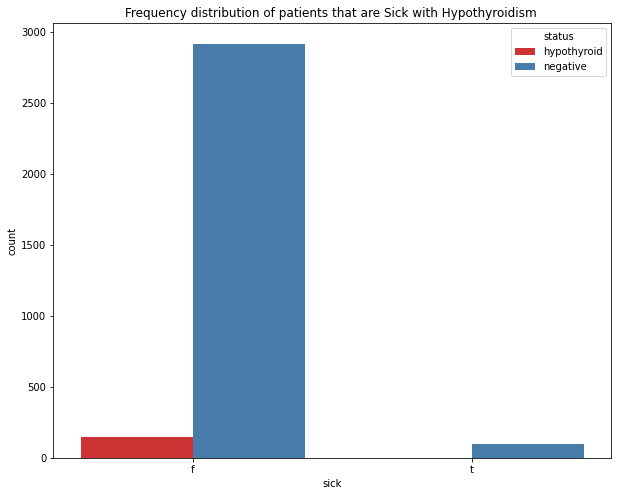

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="sick", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients that are Sick with Hypothyroidism ")
plt.show()

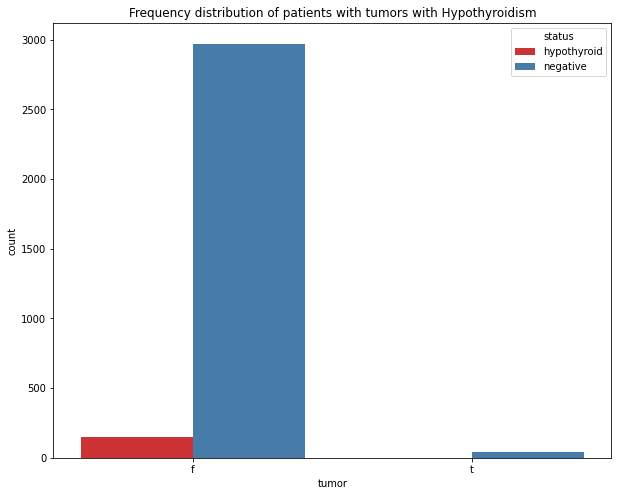

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="tumor", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients with tumors with Hypothyroidism")
plt.show()

## Selecting my Features and Target Variable

In [ ]:
X = data.drop('status',axis=1)
y = data.status

## DecisionTreeClassifier Model

The first model I built was a Decision Tree Model.

In [ ]:
dtc = DecisionTreeClassifier()
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.9794628751974723


In [ ]:
param_dist = {"max_depth": [3,5,6, None],
              "max_features": [1,2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": [1,2,3,4,5,6,7],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(estimator=dtc,param_grid=param_dist,cv=10)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1}


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=10,min_samples_leaf=1)
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9873617693522907


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 23,   3],
       [  5, 602]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.91      0.94      0.92       633
weighted avg       0.99      0.99      0.99       633



>* According to the classificstion report , in class zero for all instances classified positive, 82%  are correct and for class 1 100% were correct.

In [ ]:
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.755110
TSH                          0.188658
T4U_measured                 0.023054
on_antithyroid_medication    0.015398
age                          0.013826
thyroid_surgery              0.003953
sick                         0.000000
sex                          0.000000
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
pregnant                     0.000000
TBG_measured                 0.000000
tumor                        0.000000
goitre                       0.000000
TSH_measured                 0.000000
T3_measured                  0.000000
T3                           0.000000
TT4_measured                 0.000000
TT4                          0.000000
T4U                          0.000000
FTI_measured                 0.000000
lithium                      0.000000
dtype: float64

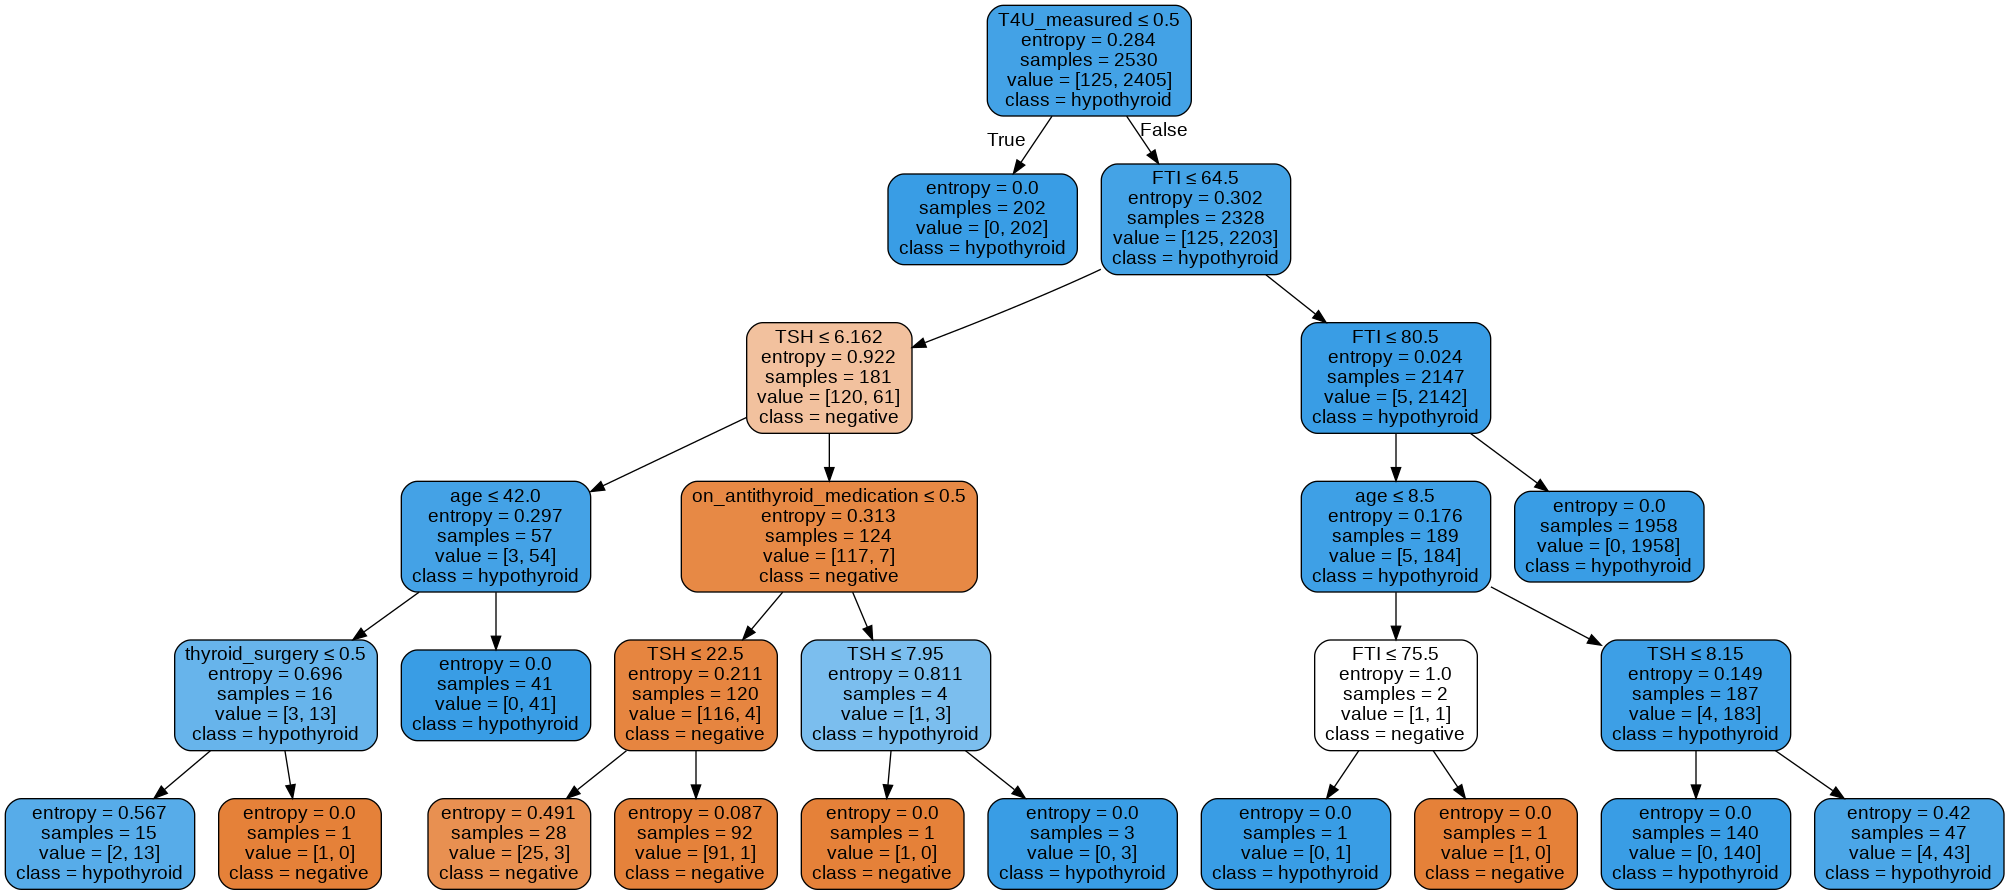

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

dot_data = io.StringIO()

#dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['negative', 'hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroid.png')
Image(graph.create_png())

## RandomForestClassifier Model

I fit a random forest model on the data .

First I defined the baseline model then tuned the hyperparameters using a Randomized Search.

In [ ]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 
print("Accuracy Score:", accuracy_score(y_test,y_predicted))

Accuracy Score: 0.9826224328593997


In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.99      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.88      0.90      0.89       633
weighted avg       0.98      0.98      0.98       633



>* I then tuned the Hyperparameters for the model using the RandomizedSearch.

In [ ]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True,False]}

grid = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,cv=10)
grid.fit(X_train,y_train)

In [ ]:
# print best parameter after tuning 
grid.best_params_  

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
rfc = RandomForestClassifier(n_estimators =1200, min_samples_split= 2, min_samples_leaf= 2, max_features='auto', max_depth= 10, bootstrap=False)
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 
print('Accuracy Score:' ,accuracy_score(y_test,y_predicted) )

Accuracy Score: 0.9842022116903634


In [ ]:
confusion_matrix(y_test,y_predicted)

array([[ 21,   5],
       [  5, 602]])

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.99      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.90      0.90      0.90       633
weighted avg       0.98      0.98      0.98       633



>* According to the classificstion report , in class zero for all instances classified positive, 81%  are correct and for class 1 99% were correct.

In [ ]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.334930
TSH                          0.264891
TT4                          0.264219
T3                           0.054364
T4U                          0.028642
age                          0.020374
on_antithyroid_medication    0.005874
TSH_measured                 0.005822
on_thyroxine                 0.004822
query_hypothyroid            0.003934
sex                          0.002440
thyroid_surgery              0.002229
T3_measured                  0.002173
sick                         0.001735
goitre                       0.001051
TBG_measured                 0.000952
query_hyperthyroid           0.000609
T4U_measured                 0.000306
TT4_measured                 0.000287
FTI_measured                 0.000247
tumor                        0.000045
pregnant                     0.000034
query_on_thyroxine           0.000018
lithium                      0.000000
dtype: float64

## AdaBoostClassifier Model

I fit a baseline AdaBoostClassifier Model on my dataset then tuned the Hyperparameters using a GridSearch

In [ ]:
abc = AdaBoostClassifier()
abc = abc.fit(X_train,y_train)
y_prediction = abc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_prediction))

Accuracy Score: 0.9889415481832543


In [ ]:
param_dist = {
 'n_estimators': [50, 100,150,200,250,300],
 'learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
 'random_state': [None,20,40,60,100]
 }

grid = GridSearchCV(estimator=abc, param_grid = param_dist,cv=10, refit = True, verbose = 3)
grid.fit(X_train, y_train)

>* After obtaining my hyperparameters I fit them into the model.

In [ ]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 150, 'random_state': None}

In [ ]:
abc = AdaBoostClassifier(n_estimators=150,learning_rate=0.01)
abc = abc.fit(X_train,y_train)
y_prediction = abc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_prediction))

Accuracy Score: 0.9873617693522907


In [ ]:
confusion_matrix(y_test,y_prediction)

array([[ 23,   3],
       [  5, 602]])

In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.91      0.94      0.92       633
weighted avg       0.99      0.99      0.99       633



>* According to the classificstion report , in class zero for all instances classified positive, 82%  are correct and for class 1 100% were correct.

In [ ]:
feature_scores = pd.Series(abc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.506667
TSH                          0.493333
TBG_measured                 0.000000
tumor                        0.000000
sex                          0.000000
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
thyroid_surgery              0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
pregnant                     0.000000
sick                         0.000000
lithium                      0.000000
goitre                       0.000000
TSH_measured                 0.000000
T3_measured                  0.000000
T3                           0.000000
TT4_measured                 0.000000
TT4                          0.000000
T4U_measured                 0.000000
T4U                          0.000000
FTI_measured                 0.000000
age                          0.000000
dtype: float64

## GradientBoostingClassifier Model

>* I first fit a baseline model and obtained the accuracy score.

In [ ]:
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
y_predd = gbc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_predd))

Accuracy Score: 0.9842022116903634


In [ ]:
parameters = {
    "n_estimators":[5,50,100,150,200,250,300,350,400,450,500],
    "max_depth":[1,2,3,4,5,6,7,8,9],
    "learning_rate":[0.001,0.0025,0.01,0.025,0.05,0.1,1],
    'max_features': [None,2,3,4,5,6,7,8,9,10]
}

grid = RandomizedSearchCV(estimator=gbc,param_distributions=parameters,cv=10,refit=True)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'learning_rate': 0.025,
 'max_depth': 7,
 'max_features': 9,
 'n_estimators': 450}

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=0.025,n_estimators=450,max_depth=7,max_features=9)
gbc = gbc.fit(X_train,y_train)
y_predd = gbc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_predd))

Accuracy Score: 0.985781990521327


In [ ]:
confusion_matrix(y_test,y_predd)

array([[ 23,   3],
       [  6, 601]])

In [ ]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.89      0.94      0.91       633
weighted avg       0.99      0.99      0.99       633



>* According to the classificstion report , in class zero for all instances classified positive, 79%  are correct and for class 1 100% were correct.

In [ ]:
feature_scores = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          4.143720e-01
TSH                          2.650464e-01
TT4                          2.140799e-01
T3                           2.857022e-02
T4U                          2.687503e-02
age                          1.985789e-02
on_antithyroid_medication    1.015747e-02
on_thyroxine                 6.707411e-03
TSH_measured                 4.279007e-03
thyroid_surgery              3.100776e-03
query_hypothyroid            2.109523e-03
sex                          2.072260e-03
T3_measured                  1.058557e-03
goitre                       1.000934e-03
query_hyperthyroid           2.202430e-04
pregnant                     1.540611e-04
sick                         1.492578e-04
TBG_measured                 7.687865e-05
T4U_measured                 7.372294e-05
query_on_thyroxine           3.400662e-05
TT4_measured                 4.451201e-06
tumor                        4.562818e-09
FTI_measured                 3.908639e-09
lithium                      0.000

## SUPPORT VECTOR MACHINE MODELS

For my SVM models I opted to use the two features with the highest scores in my DecisionTree model ie FTI and TSH.

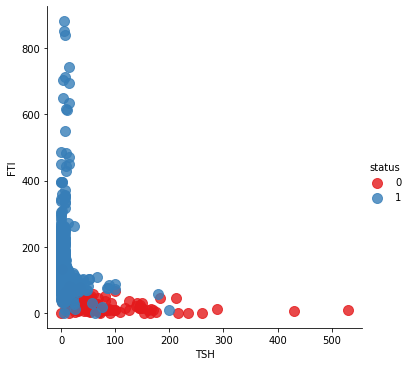

In [ ]:
# Plotting our desired features
sns.lmplot(x='TSH',y='FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 100})


In [ ]:
X = data[['FTI','TSH']].values
y = data.status.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

I then Standardized the values using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### SVM Linear Kernel

>* I first fit a linear kernel to the SVM model

In [ ]:
svl = SVC(kernel='linear')
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)
print('Accuracy Score :' , accuracy_score(y_test,y_preddd))


Accuracy Score : 0.985781990521327


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1,0.05, 1,5,7, 10,25 ,50],
              'random_state' : [None,10,20,40,60,100]
}
grid = GridSearchCV(svl, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 


In [ ]:
print("Best Parameters:" , grid.best_params_)

Best Parameters: {'C': 1, 'random_state': None}


In [ ]:
svl = SVC(kernel='linear',C=1)
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)
print('Accuracy Score :' , accuracy_score(y_test,y_preddd))


Accuracy Score : 0.981042654028436


In [ ]:
confusion_matrix(y_test,y_preddd)

array([[ 18,  11],
       [  1, 603]])

In [ ]:
print(classification_report(y_test,y_preddd))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75        29
           1       0.98      1.00      0.99       604

    accuracy                           0.98       633
   macro avg       0.96      0.81      0.87       633
weighted avg       0.98      0.98      0.98       633



>* According to the classificstion report , in class zero for all instances classified positive, 95%  are correct and for class 1 98% were correct.

### SVM Radial Basis Function Kernel.

>* I fit a rbf Kernel to the SVM model

In [ ]:
svr = SVC(kernel='rbf')
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_preddd))

Accuracy Score: 0.9842022116903634


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1,5, 10, 50,100, 1000],  
              'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001], 
              'random_state' : [None,10,20,40,60,100]
              }   
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 


In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 1, 'random_state': None}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
svr = SVC(kernel='rbf',gamma=1,C=1000)
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)
print("Accuracy_score:" , accuracy_score(y_test,y_preddd))

Accuracy_score: 0.9889415481832543


In [ ]:
confusion_matrix(y_test,y_preddd)

array([[ 22,   7],
       [  0, 604]])

In [ ]:
print(classification_report(y_test,y_preddd))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        29
           1       0.99      1.00      0.99       604

    accuracy                           0.99       633
   macro avg       0.99      0.88      0.93       633
weighted avg       0.99      0.99      0.99       633



>* According to the classificstion report , in class zero for all instances classified positive, 100%  are correct and for class 1 99% were correct.

### SVM Polynomial Kernel

In [ ]:
svp = SVC(kernel='poly')
svp  = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)
print("Accuracy Score :" , accuracy_score(y_test,y_preddd))

Accuracy Score : 0.9826224328593997


In [ ]:
# defining parameter range 
param_grid = {'C': [ 1,5,10,20,25,30],  
              'degree':[2,3,4,]
                      }   
grid = GridSearchCV(svp, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

In [ ]:
print('Best Parameters:',grid.best_params_)

Best Parameters: {'C': 10, 'degree': 3}


In [ ]:
svp = SVC(kernel='poly',C=10, degree=3)
svp = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)
print('Accuracy Score :', accuracy_score(y_test,y_preddd))

Accuracy Score : 0.9842022116903634


In [ ]:
confusion_matrix(y_test,y_preddd)

array([[ 27,   9],
       [  1, 596]])

In [ ]:
print(classification_report(y_test,y_preddd))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        36
           1       0.99      1.00      0.99       597

    accuracy                           0.98       633
   macro avg       0.97      0.87      0.92       633
weighted avg       0.98      0.98      0.98       633



>* According to the classificstion report , in class zero for all instances classified positive, 82%  are correct and for class 1 100% were correct.
>* The model correct classified 75% of true positives in class 0 and 100% in class 1.

### Fitting to my best performing Kernel.

The best performing Kernel was the Radial Basis Function kernel with a precision of 1.0 and 0.99.

Therefore I fit the rest of my features to the rbf kernel

In [ ]:
X = data[['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
          'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3',
          'TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured']].values
y = data.status.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Then I standardized using the Standard Scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [ ]:
svr = SVC(kernel='rbf',gamma=1,C=1000)
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)
print("Accuracy_score:" , accuracy_score(y_test,y_preddd))

Accuracy_score: 0.966824644549763


In [ ]:
print(classification_report(y_test,y_preddd))

              precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.97      1.00      0.98       607

    accuracy                           0.97       633
   macro avg       0.85      0.65      0.71       633
weighted avg       0.96      0.97      0.96       633



The model with two fearures performs better than the model with all the features which has a precision of 73% and 97% respectively.